In [1]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import tqdm

# display all columns
pd.set_option('display.max_columns', None)


In [3]:
poke_cards_df = pd.read_csv("hf://datasets/TheFusion21/PokemonCards/train.csv")
poke_data_df = pd.read_csv('data/pokemon.csv')

In [4]:
poke_cards_df.head()

id                                       image_url  \
0    pl3-1    https://images.pokemontcg.io/pl3/1_hires.png   
1   ex12-1   https://images.pokemontcg.io/ex12/1_hires.png   
2    xy5-1    https://images.pokemontcg.io/xy5/1_hires.png   
3  mcd19-1  https://images.pokemontcg.io/mcd19/1_hires.png   
4    ex7-1    https://images.pokemontcg.io/ex7/1_hires.png   

                                             caption        name  hp  \
0  A Basic, SP Pokemon Card of type Darkness with...     Absol G  70   
1  A Stage 1 Pokemon Card of type Colorless with ...  Aerodactyl  70   
2  A Basic Pokemon Card of type Grass with the ti...      Weedle  50   
3  A Basic Pokemon Card of type Grass with the ti...    Caterpie  50   
4  A Stage 1 Pokemon Card of type Water with the ...   Azumarill  80   

                     set_name  
0             Supreme Victors  
1                Legend Maker  
2                Primal Clash  
3  McDonald's Collection 2019  
4         Team Rocket Returns

In [5]:
poke_data_df[['pokedex_number', 'name', 'hp', 'type1', 'type2', 'generation', 'is_legendary']].head()

pokedex_number        name  hp  type1   type2  generation  is_legendary
0               1   Bulbasaur  45  grass  poison           1             0
1               2     Ivysaur  60  grass  poison           1             0
2               3    Venusaur  80  grass  poison           1             0
3               4  Charmander  39   fire     NaN           1             0
4               5  Charmeleon  58   fire     NaN           1             0

In [14]:
poke_data_df['generation'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [11]:
poke_data_df[poke_data_df['name'].str.contains('za', case=False)]['name']

5      charizard
64      alakazam
144       zapdos
262    zigzagoon
334     zangoose
383     rayquaza
520     unfezant
Name: name, dtype: object

In [6]:
# check how many times the name of a pokemon from the poke_data_df appears in the poke_cards_df and add a new column to the poke_cards_df
# let's lowercase the names in both dataframes when matching

poke_data_df['name'] = poke_data_df['name'].str.lower()
poke_cards_df['name'] = poke_cards_df['name'].str.lower()

# count how many times each name appears in the poke_cards_df
poke_data_df['count'] = poke_data_df['name'].apply(lambda x: poke_cards_df['name'].str.contains(x).sum())

In [50]:
poke_data_df[poke_data_df['name'] == 'moltres']

abilities  against_bug  against_dark  against_dragon  \
145  ['Pressure', 'Flame Body']         0.25           1.0             1.0   

     against_electric  against_fairy  against_fight  against_fire  \
145               2.0            0.5            0.5           0.5   

     against_flying  against_ghost  against_grass  against_ground  \
145             1.0            1.0           0.25             0.0   

     against_ice  against_normal  against_poison  against_psychic  \
145          1.0             1.0             1.0              1.0   

     against_rock  against_steel  against_water  attack  base_egg_steps  \
145           4.0            0.5            2.0     100           20480   

     base_happiness  base_total capture_rate  classfication  defense  \
145              35         580            3  Flame Pokémon       90   

     experience_growth  height_m  hp japanese_name     name  percentage_male  \
145            1250000       2.0  90     Fireファイヤー  moltres              NaN   

     pokedex_number  sp_attack  sp_defense  speed type1   type2  weight_kg  \
145             146        125          85     90  fire  flying       60.0   

     generation  is_legendary  count  
145           1             1     36

In [58]:
spc_df = poke_cards_df[poke_cards_df['name'].str.contains('moltres')]

In [59]:
spc_df.shape

(36, 6)

In [60]:
def fetch_and_display_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


In [71]:

# Example: Display the first image in the dataset
# first_image_url = poke_cards_df.loc[0, 'image_url']
# fetch_and_display_image(first_image_url)
# print the shape of the image
# img = Image.open(BytesIO(requests.get(first_image_url).content))
# The images are 600x825, let's pad them to be square and then output them in a folder for the whole dataset
for index, row in tqdm.tqdm(poke_cards_df[['name', 'image_url']].iterrows(), total=len(poke_cards_df)):
    img = Image.open(BytesIO(requests.get(row['image_url']).content))
    img = img.resize((825, 825), Image.ANTIALIAS)
    img.save(f'./data/cards/{row["name"]}.png')

  0%|          | 0/36 [00:00<?, ?it/s]C:\Users\arist\AppData\Local\Temp\ipykernel_20668\1289854180.py:9: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((825, 825), Image.ANTIALIAS)
2657it [46:54,  1.32s/it]                      

In [17]:
# The images are 600x825, let's resize them to 64x64 in grayscale and output them in a folder for the whole dataset
for index, row in tqdm.tqdm(poke_cards_df[['name', 'image_url']].iterrows(), total=len(poke_cards_df)):
    img = Image.open(BytesIO(requests.get(row['image_url']).content))
    img = img.resize((64, 64), Image.ANTIALIAS).convert('RGB')
    img.save(f'./data/cards_64_RGB/{row["name"]}.png')

  0%|          | 0/13139 [00:00<?, ?it/s]C:\Users\arist\AppData\Local\Temp\ipykernel_9504\3815565376.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize((64, 64), Image.ANTIALIAS).convert('RGB')
 37%|███▋      | 4858/13139 [21:51<39:17,  3.51it/s]  c:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 60%|█████▉    | 7850/13139 [34:58<23:33,  3.74it/s]


OSError: [Errno 22] Invalid argument: './data/cards_64_RGB/unown ?.png'

blaine's moltres


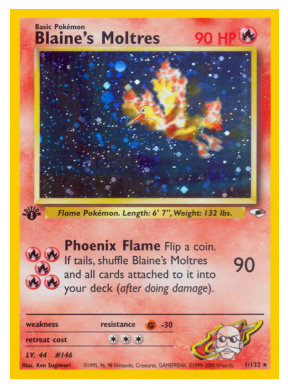

moltres


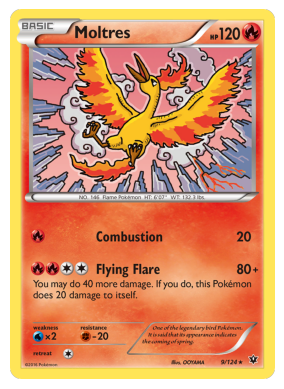

moltres


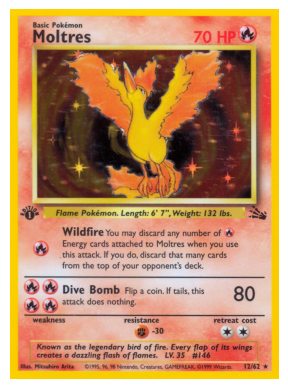

rocket's moltres


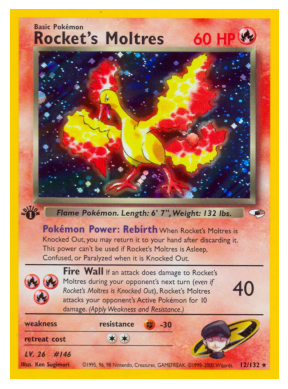

moltres


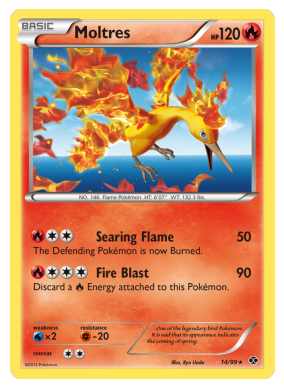

moltres-ex


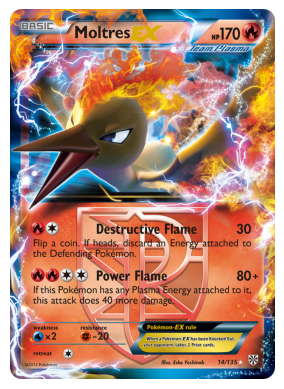

moltres


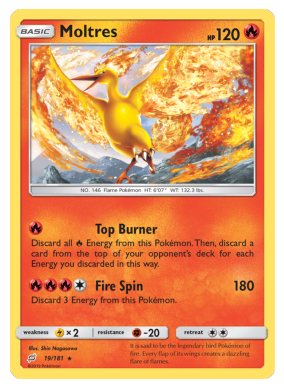

moltres


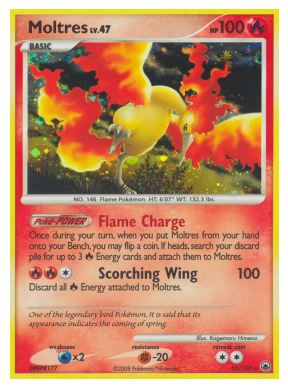

moltres


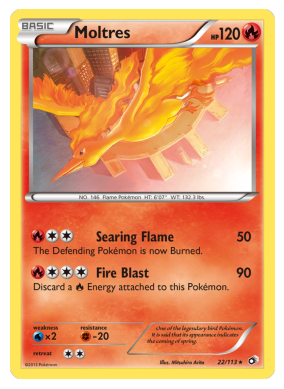

moltres


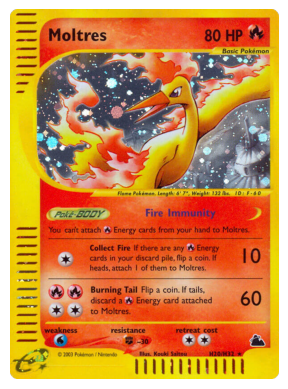

moltres


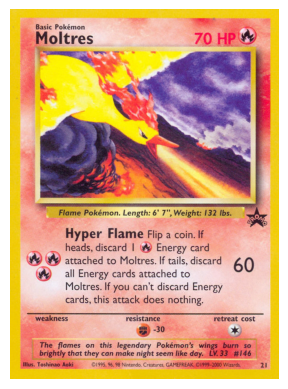

moltres


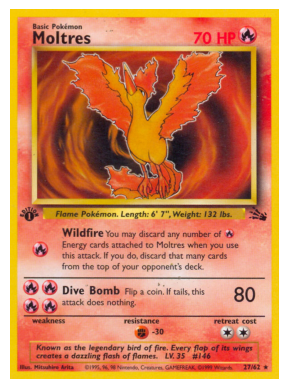

moltres


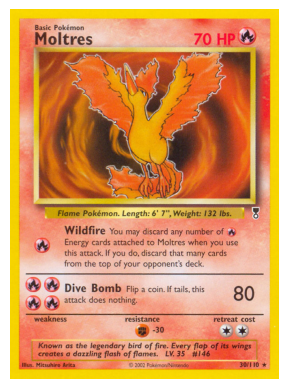

moltres


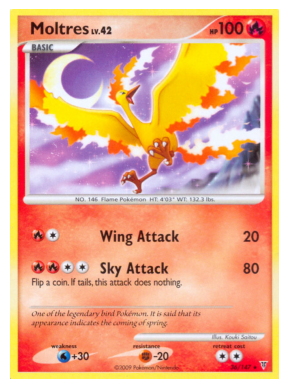

moltres


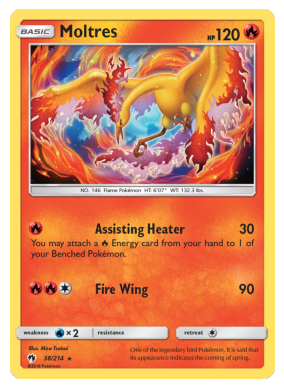

moltres ex


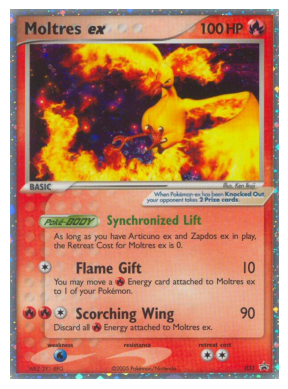

moltres & zapdos & articuno-gx


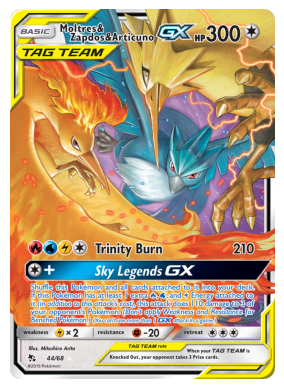

moltres


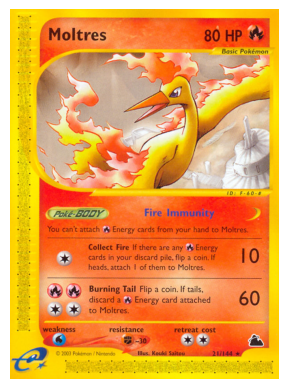

moltres & zapdos & articuno-gx


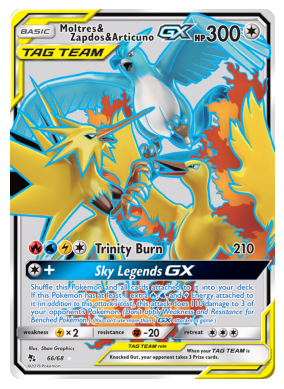

moltres & zapdos & articuno-gx


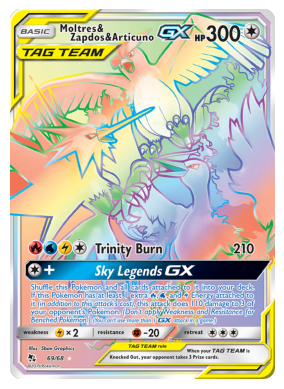

rocket's moltres ex


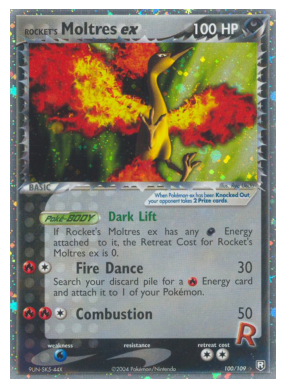

moltres ex


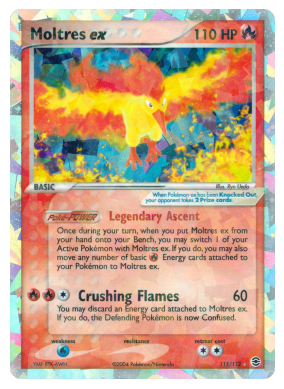

moltres


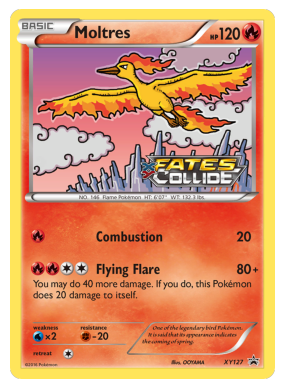

moltres


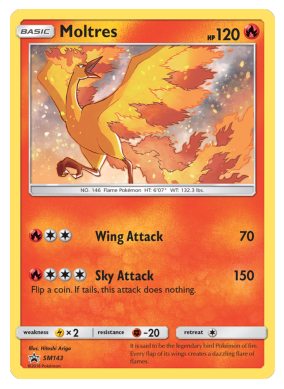

moltres


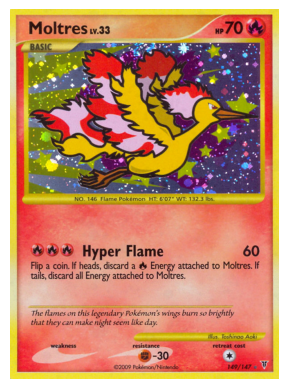

moltres & zapdos & articuno-gx


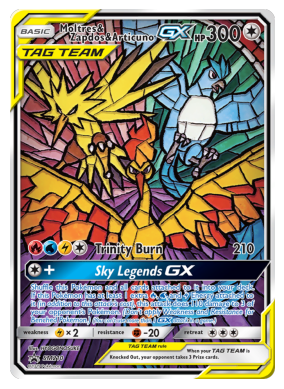

galarian moltres v


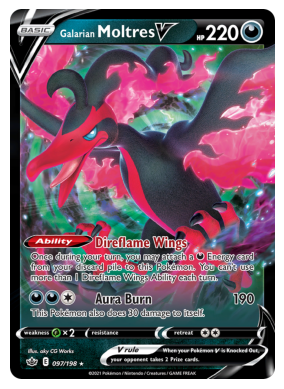

galarian moltres v


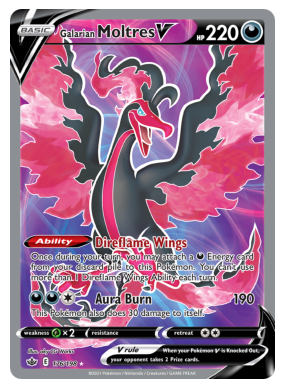

galarian moltres v


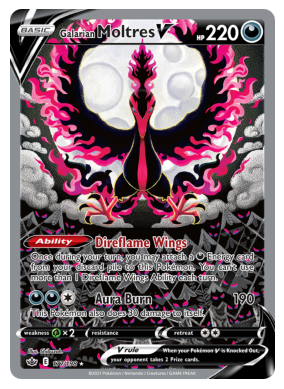

galarian moltres


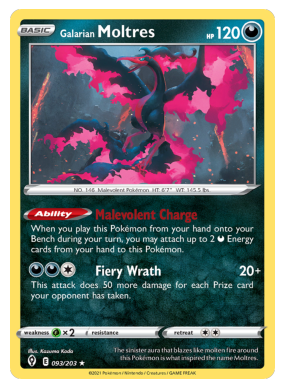

galarian moltres


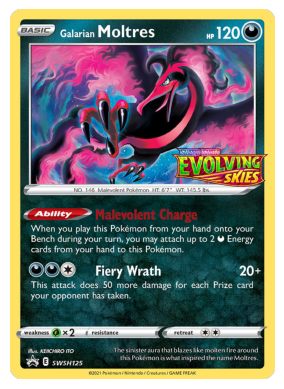

moltres


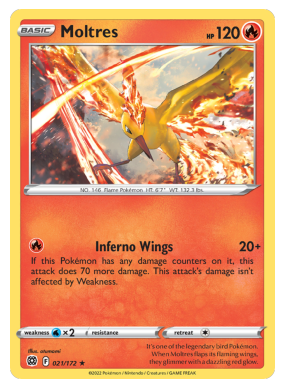

galarian moltres v


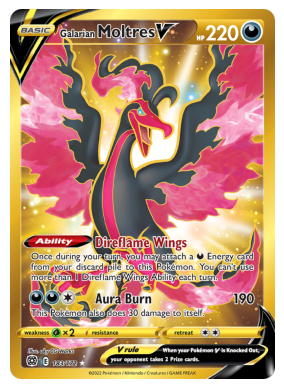

moltres


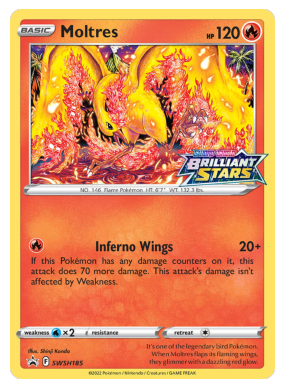

galarian moltres v


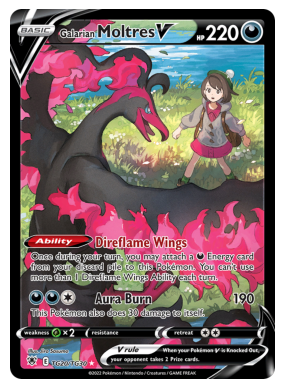

moltres


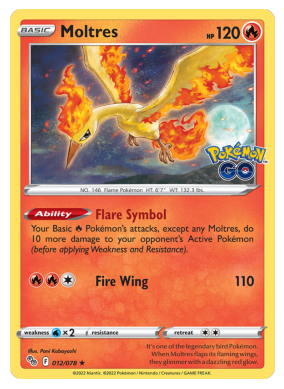

In [62]:

for index, row in spc_df[['name', 'image_url']].iterrows():
    print(row['name'])
    fetch_and_display_image(row['image_url'])

In [18]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import imageio
import os

# Directory containing the .bmp images
image_folder = 'samples/exp_64_g_500'

# Output GIF file
output_file = 'exp_64_g_500.gif'

# count = 0
# total = len(os.listdir(image_folder))
# total_cnt = 0

# Read images from the directory, sorted by filename
images = []
for file_name in sorted(os.listdir(image_folder)):
    # total_cnt += 1
    if file_name.startswith('epoch_') and file_name.endswith('.bmp'):
        # count += 1
        # print(f'Processing {count}/{total_cnt}({total}) images')
        file_path = os.path.join(image_folder, file_name)
        images.append(imageio.imread(file_path))

# Create the GIF
imageio.mimsave(output_file, images, duration=0.25)


C:\Users\arist\AppData\Local\Temp\ipykernel_9504\3542184309.py:22: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
